#### Import required packages

In [1]:
# numeric and plotting libraries
import time
import os
import shutil
import math
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
from PIL import Image
import csv
import operator 
import pandas as pd 
# to create confusion metrics
import seaborn as sns
import scipy.io as sio
from cmath import nan
from cmath import isnan

In [2]:
from ipynb.fs.full.data_prep import *

d:\Marija\noise correlation\LMU_neuroscience\data_prep.ipynb:118: RuntimeWarning: invalid value encountered in multiply
  "    lista = [[k[0] for k in list1], [k[0] for k in list2], [k[0] for k in list3], [k[0] for k in list4]]\n",
d:\Marija\noise correlation\LMU_neuroscience\data_prep.ipynb:204: RuntimeWarning: invalid value encountered in multiply
  ]
d:\Marija\noise correlation\LMU_neuroscience\data_prep.ipynb:291: RuntimeWarning: invalid value encountered in multiply
  "                        dat_seaw_df[dat_seaw_df == np.inf] = 0\n",
d:\Marija\noise correlation\LMU_neuroscience\data_prep.ipynb:380: RuntimeWarning: invalid value encountered in multiply
  "                    dat_sean_df_ = dat_sean_df[0:1,:,:]\n",


In [ ]:
%matplotlib inline

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Classification on 5 different speakers / all regions

#### Data preparation

In [ ]:
def ucitavanje_sp(directory):
    id = 0
    data = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        label = [int(f.split("\\")[-1][-5:-4])]
        id = id + 1
        dat = np.load(f)
        data.append([id, dat, label])
    
    #random.seed(2)
    random.shuffle(data)
    return data      

In [ ]:
def podela_podataka_sp(data_vectors):
    
    max = 0
    for i in range(0,len(data_vectors)):
        if(data_vectors[i][1].shape[0] > max):
            max = data_vectors[i][1].shape[0]

    max_norm = 0
    min_norm = 50
    for a in data_vectors:
        for x in a[1]:
            for y in x:
                if(y > max_norm):
                    max_norm = y
                if(y < min_norm):
                    min_norm = y

    for a in range(0, len(data_vectors)):
        for x in range(0, len(data_vectors[a][1])):
            for y in range(0, len(data_vectors[a][1][x])):
                data_vectors[a][1][x][y] = (data_vectors[a][1][x][y] - min_norm) / (max_norm - min_norm)


    y_train, y_test, X_tr, X_ts = [], [], [], []
    
    i1,i2,i3,i4,i5 = 0,0,0,0,0

    random.shuffle(data_vectors)

    for item in data_vectors:

        if item[2]==[0]:
            i1 = i1 + 1
            if i1 <= 200:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant' , constant_values=0)

                X_test = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_test:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_ts.append(temp) 

                y_test.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
            else:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)

                X_train = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_train:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_tr.append(temp)

                y_train.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
                
        elif item[2]==[1]:
            i2 = i2 + 1
            if  i2 <= 200:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_test = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_test:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_ts.append(temp) 

                y_test.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
            else:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_train = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_train:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_tr.append(temp)

                y_train.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
        elif item[2]==[2]:
            i3 = i3 + 1
            if  i3 <= 200:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_test = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_test:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_ts.append(temp) 

                y_test.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
            else:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_train = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_train:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_tr.append(temp)

                y_train.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
        elif item[2]==[4]:
            i4 = i4 + 1
            if  i4 <= 200:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_test = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_test:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_ts.append(temp) 

                y_test.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
            else:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_train = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_train:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_tr.append(temp)

                y_train.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
        else:
            i5 = i5 + 1
            if  i5 <= 200:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_test = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_test:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_ts.append(temp) 

                y_test.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
            else:
                if(np.array(item[1]).shape[0] < max):
                    item[1] = np.pad(item[1], [(0, max-np.array(item[1]).shape[0]), (0, 0)], mode='constant', constant_values=0)
                
                X_train = item[1].reshape(1, item[1].shape[0], item[1].shape[1])
                temp = []
                for i in X_train:
                    for j in i:
                        for k in j:
                            if(isnan(k)):
                                k = 0
                            temp.append(k)
                    X_tr.append(temp)

                y_train.append(item[2])
                #y_test.append(random.choice([[0], [1]]))
    
    X_train = np.array(X_tr)
    y_train = np.array(y_train)
    X_test = np.array(X_ts)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test

#### Test / Train set

In [ ]:
#putanja = "C:/Users/Zephyrus/Desktop/cnn data/data"
putanja = "C:/Users/m.nedeljkovic/Desktop/cnn data/data"
#niz od podataka za svaku sekvencu (podatak je niz od id-ja, sekvence i labele)
podaci = ucitavanje_sp(putanja)
X_train, y_train, X_test, y_test = podela_podataka_sp(podaci)

##### check

In [ ]:
cc = []
for i in range(0,len(X_train)):
    if not(len(X_train[i]) in cc):
        print(len(X_train[i]))
        cc.append(len(X_train[i]))

3689


In [ ]:
x1,y1,x2,y2 = [],[],[],[]

for i in range(0,len(X_train)):
    if(len(X_train[i])==18445):
        x1.append(X_train[i])
        y1.append(y_train[i])

for i in range(0,len(X_test)):
    if(len(X_test[i])==18445):
        x2.append(X_test[i])
        y2.append(y_test[i])

X_train = x1
y_train = y1
X_test = x2
y_test = y2

In [ ]:
X_tr = []
for i in X_train:
    temp = []
    for j in i:
        for k in j:
            if(isnan(k)):
                k = 0
            temp.append(k)
    X_tr.append(temp)
X_train = np.array(X_tr, dtype=object)

X_ts = []
for i in X_test:
    temp = []
    for j in i:
        for k in j:
            if(isnan(k)):
                k = 0
            temp.append(k)
    X_ts.append(temp) 
X_test = np.array(X_ts, dtype=object)

TypeError: 'numpy.float64' object is not iterable

### KNN

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(0,)
(0,)
(0,)
(0,)


In [ ]:
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

KNN Accuracy: 0.160


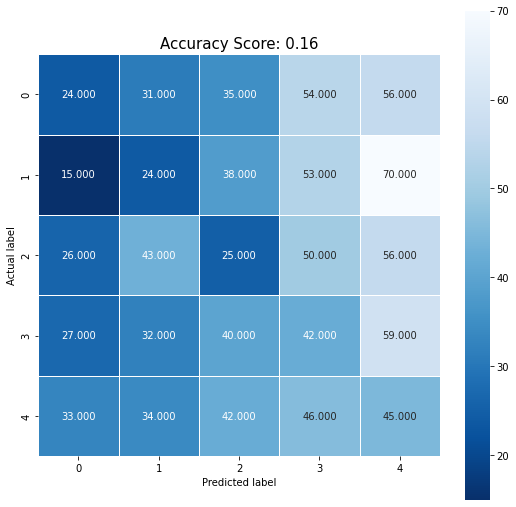

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)
knn_acc = accuracy_score(y_test,predictions)

### Random Forest

In [ ]:
def RF(X_train, y_train, X_test, y_test):
    forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=5,
                                    random_state=1,
                                    n_jobs=2)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    return y_pred

In [ ]:
def mat_of_conf(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title,size=15)
    plt.show()

C:\Users\m.nedeljkovic\AppData\Local\Temp\ipykernel_17632\3284241286.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Accuracy: 0.184


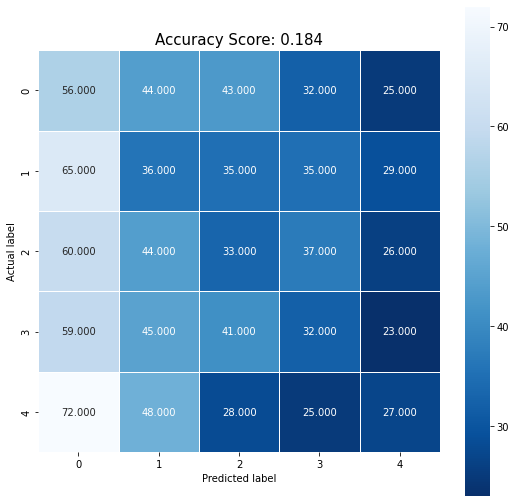

In [ ]:
Forest = RF(X_train, y_train, X_test, y_test)
mat_of_conf(y_test,Forest)
rf_acc = accuracy_score(y_test, Forest)

### XG boost

In [ ]:
eval = [(X_train, y_train),(X_test, y_test)]
classif = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.0001, max_depth = 1, alpha = 0.1, n_estimators = 200,  eta=0.05)
classif.fit(X_train,y_train)
preds = classif.predict(X_test)
score = accuracy_score(y_test, preds)
print('Accuracy: %.3f' % score)
results = classif.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()
xgb_acc = score

Accuracy: 0.207


XGBoostError: No evaluation result, `eval_set` is not used during training.

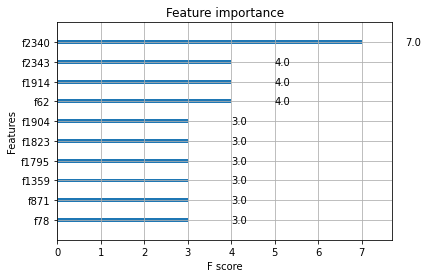

In [ ]:
from turtle import width
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model, max_num_features=10)
plt.show()

x = model.feature_importances_

In [ ]:
max(x)

0.046086375

In [ ]:
x = [0.55, 0.63, 0.72]

In [ ]:
y = [0.5, 0.52, 0.6]

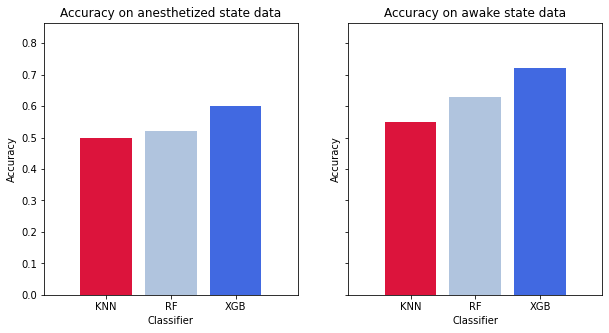

In [ ]:

f, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,5))
ax1.margins(0.2) 
ax2.margins(0.2)
ax2.bar(["KNN", "RF", "XGB"], x, color=['crimson', 'lightsteelblue', 'royalblue'])
ax2.set_title('Accuracy on awake state data')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Classifier')
ax1.bar(["KNN", "RF", "XGB"], y, color=['crimson', 'lightsteelblue', 'royalblue'])
ax1.set_title('Accuracy on anesthetized state data')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Classifier')
plt.savefig('speakers.svg')
plt.show()